In [119]:
%matplotlib inline

import quandl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)
rcParams['figure.dpi'] = 200
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 20
rcParams['patch.edgecolor'] = 'none'

In [108]:
quandl.ApiConfig.api_key = '4sQtEaHeVFG8uteLspbA'

data = quandl.get("ZILL/Z02115_SPY")
data = data.rename(columns={'Value':'turnover_rate'})

data.head()

,turnover_rate
Date,
1998-01-31,8.7875
1998-02-28,8.7875
1998-03-31,9.0631
1998-04-30,9.3693
1998-05-31,9.4917


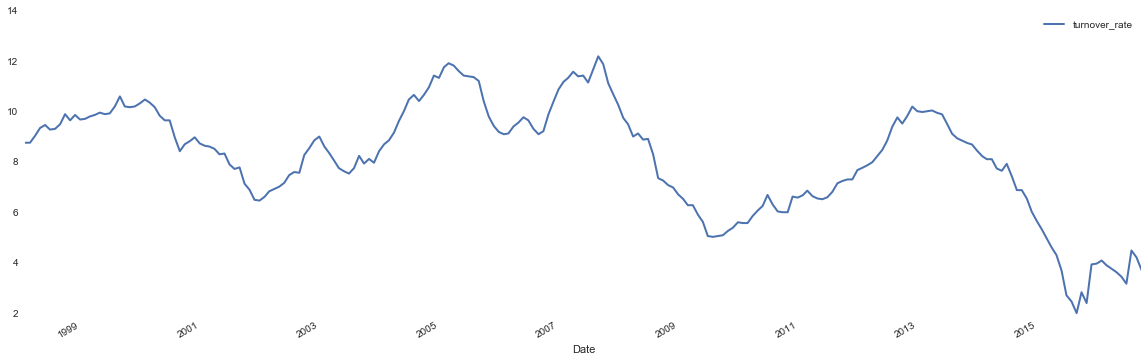

In [121]:
data[['turnover_rate']].plot()

In [34]:
data2 = quandl.get("ZILL/Z02115_SFL")
data2 = data2.rename(columns={'Value':'per_sold_for_loss'})

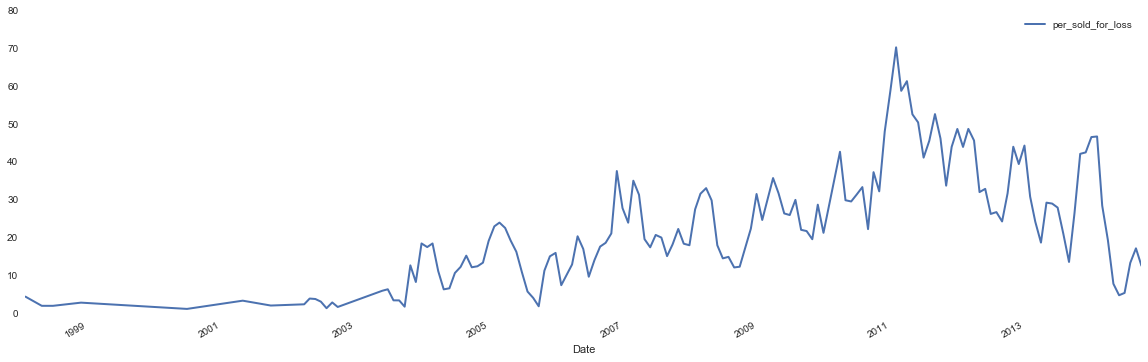

In [35]:
data2.plot()

In [67]:
combined = pd.concat([data, data2], axis=1)

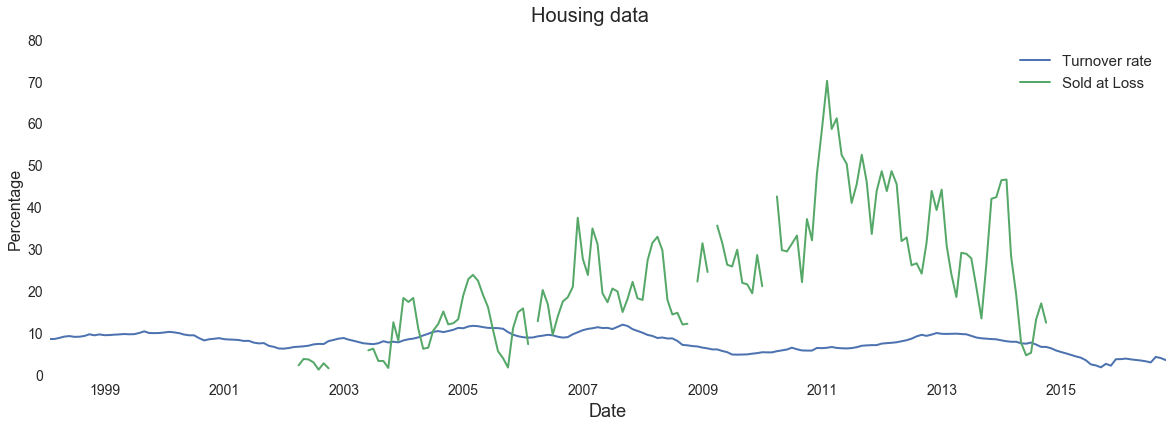

In [83]:
fig = plt.figure()
plt.plot(combined['Value'], label='Turnover rate')
plt.plot(combined['per_sold_for_loss'], label='Sold at Loss')
plt.legend(loc='upper right', fontsize=15)
fig.suptitle('Housing data', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Percentage', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

In [101]:
counties = pd.read_csv('http://static.quandl.com/zillow/county_codes.csv', header=None)

counties.columns=['county','state','city|code']
counties['county_state'] = counties['county'] + ',' + counties['state']

counties['largest_city'] = counties['city|code'].apply(lambda s: s.split('|')[0])
counties['code'] = counties['city|code'].apply(lambda s: s.split('|')[1])

del counties['city|code']
del counties['county']
del counties['state']

counties.head()

,county_state,largest_city,code
0,"Los Angeles,CA",Los Angeles,00001
1,"Cook,IL",Chicago,00002
2,"Maricopa,AZ",Phoenix,00003
3,"San Diego,CA",San Diego,00004
4,"Orange,CA",Los Angeles,00005


In [125]:
county_list = ['Los Angeles,CA','Cook,IL','Dallas,TX','Queens,NY','Middlesex,MA']

In [126]:
price_to_rent = pd.DataFrame()

for county in county_list:
    county_code = counties[counties.county_state == county]['code'].values[0]
    
    api_prr = 'ZILL/CO'+str(county_code)+'_PRR'
    price_to_rent = pd.concat([price_to_rent, quandl.get(api_prr)],axis=1)
    price_to_rent = price_to_rent.rename(columns={'Value':county})
    
price_to_rent.head()

,"Los Angeles,CA","Cook,IL","Dallas,TX","Queens,NY","Middlesex,MA"
Date,,,,,
2010-10-31,15.14,11.61,7.77,25.35,15.61
2010-11-30,15.02,11.20,7.76,26.04,15.36
2010-12-31,15.11,11.05,7.64,25.78,15.40
2011-01-31,15.07,11.29,7.60,25.07,15.52
2011-02-28,14.84,11.02,7.74,24.14,15.49


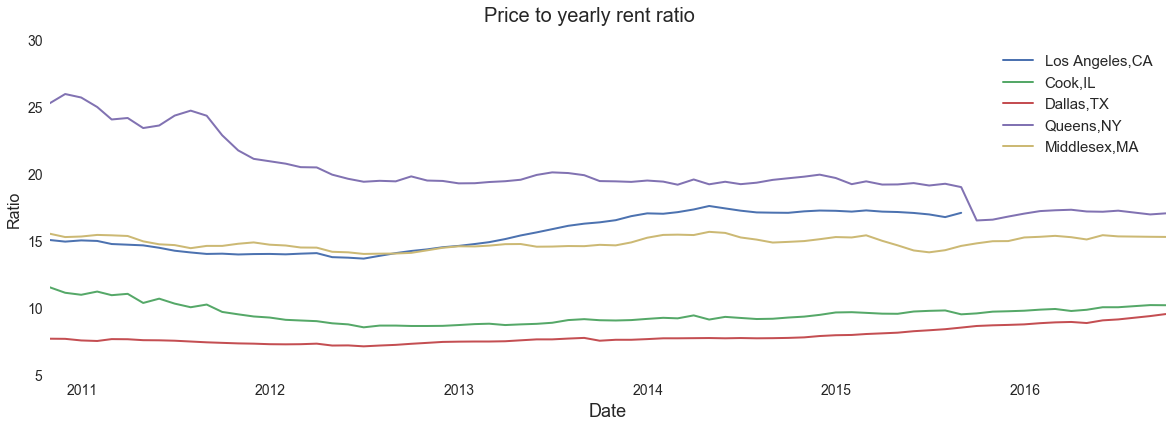

In [127]:
fig = plt.figure()

for county in county_list:
    plt.plot(price_to_rent[county])


plt.legend(loc='upper right', fontsize=15)
fig.suptitle('Price to yearly rent ratio', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Ratio', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

In [128]:
sold_at_loss = pd.DataFrame()

for county in county_list:
    county_code = counties[counties.county_state == county]['code'].values[0]
    
    api_sfl = 'ZILL/CO'+str(county_code)+'_SFL'
    sold_at_loss = pd.concat([sold_at_loss, quandl.get(api_sfl)],axis=1)
    sold_at_loss = sold_at_loss.rename(columns={'Value':county})
    
sold_at_loss.head()

,"Los Angeles,CA","Cook,IL","Dallas,TX","Queens,NY","Middlesex,MA"
Date,,,,,
1998-01-31,1.5173,0.5894,2.1889,1.1401,2.8793
1998-02-28,1.7486,0.7899,2.4981,1.5180,3.2441
1998-03-31,1.6897,0.9345,2.3593,1.4693,3.4191
1998-04-30,1.5440,0.8894,2.3841,1.2960,2.9552
1998-05-31,1.3121,0.7357,2.2620,1.5856,2.5232


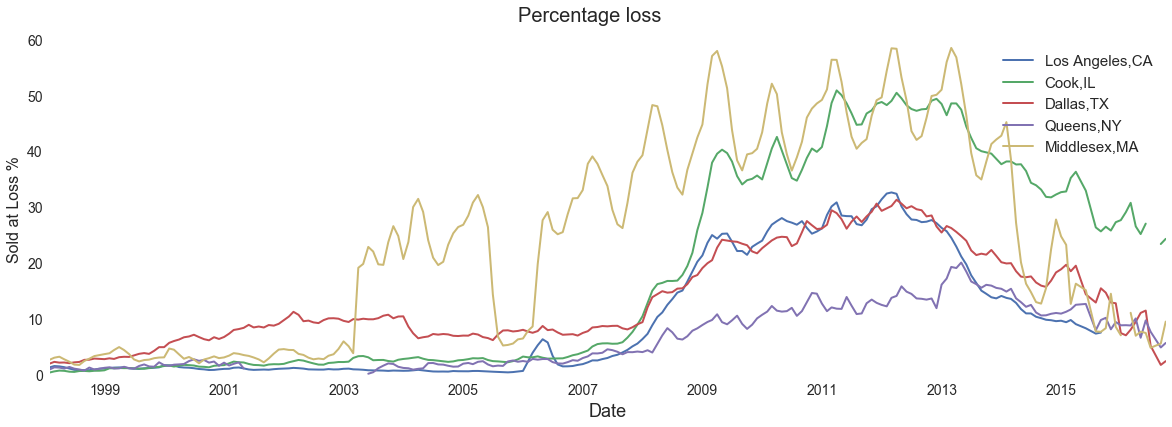

In [129]:
fig = plt.figure()

for county in county_list:
    plt.plot(sold_at_loss[county])


plt.legend(loc='upper right', fontsize=15)
fig.suptitle('Percentage loss', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sold at Loss %', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

In [16]:
a=1.
a

1.0